# Creating rasters

Let's revisit the code to create a potentiometric surface for a heavily stressed portion of the High Plains Aquifer system in southwestern Kansas. 

We've already run this code earlier this semester.

In [1]:
# First we import a few packages that we have already used: pandas, matplotlib, pylab, numpy
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import numpy as np

# import cartopy, which we will use to map
import cartopy.crs as ccrs                   # import projections
import cartopy.feature as cf                 # import features


# import the UniversalKriging function from pykrige.uk 
from pykrige.uk import UniversalKriging

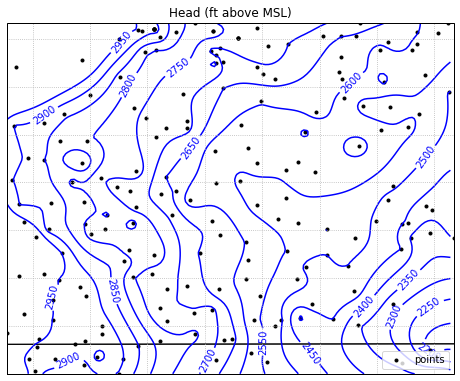

In [2]:
# High Plains aquifer data from Kansas, import into dataframe
hp_dtw = pd.read_excel('highplains_ks_south.xlsx')
# add a column for head and calculate as (land surface - depth to water)
hp_dtw = hp_dtw.join(pd.DataFrame({'heads_ft': hp_dtw['land_ftamsl']-hp_dtw['dtw_ft']}))
# Must convert lat and long of each point to a numpy array
longx = np.array(hp_dtw['long'])
laty = np.array(hp_dtw['lat'])

# conduct the Universal Kriging, note that the output is an object that we have to work with later. 
UK = UniversalKriging(longx, laty, hp_dtw['heads_ft'], variogram_model='spherical')
# define the area over which to plot data
minlat = 36.9
maxlat = 38.
minlong = -101.6
maxlong = -100.2

# create xpoints and ypoints in space, with 0.1 spacing
xpoints = np.arange(minlong,maxlong,0.01)
ypoints = np.arange(minlat,maxlat,0.01)

# create a meshgrid with xpoints and ypoints, to be used later in the code
X,Y = np.meshgrid(xpoints,ypoints)

# calculate the interpolated grid and fill values.
z, var = UK.execute('grid', xpoints,ypoints)
z = z.filled(fill_value=None)

BOUNDS = [minlong,maxlong,minlat,maxlat]
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(BOUNDS) # not setting bounds means we can see the full extent of the projected space.
ax.set_title("Head (ft above MSL)")
ax.add_feature(cf.STATES)
ax.gridlines(linestyle=":")

# create contours from the interpolation
cset = plt.contour(X,Y,z,np.arange(2000, 3000, 50),colors='blue')

# contour labels
pylab.clabel(cset, inline=1, fontsize=10,fmt='%1.0f')

# plot the points that were measured
plt.scatter(longx, laty, marker=".", color="black", label="points")


plt.legend(loc='lower right')
plt.title('Head (ft above MSL)')
plt.show()


Now let's export a raster. There are a couple of changes that we need to make. First, let's import another function from pykrige that writes a raster file. 

In [3]:
from pykrige.kriging_tools import write_asc_grid

Using this function, we create an ASCII grid zile, which is basically the same thing that we read into CartoPy except formatted for QGIS or ARCGIS. For more details, see here:

https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/generated/pykrige.kriging_tools.write_asc_grid.html

In [9]:
ypoints

array([36.9 , 36.91, 36.92, 36.93, 36.94, 36.95, 36.96, 36.97, 36.98,
       36.99, 37.  , 37.01, 37.02, 37.03, 37.04, 37.05, 37.06, 37.07,
       37.08, 37.09, 37.1 , 37.11, 37.12, 37.13, 37.14, 37.15, 37.16,
       37.17, 37.18, 37.19, 37.2 , 37.21, 37.22, 37.23, 37.24, 37.25,
       37.26, 37.27, 37.28, 37.29, 37.3 , 37.31, 37.32, 37.33, 37.34,
       37.35, 37.36, 37.37, 37.38, 37.39, 37.4 , 37.41, 37.42, 37.43,
       37.44, 37.45, 37.46, 37.47, 37.48, 37.49, 37.5 , 37.51, 37.52,
       37.53, 37.54, 37.55, 37.56, 37.57, 37.58, 37.59, 37.6 , 37.61,
       37.62, 37.63, 37.64, 37.65, 37.66, 37.67, 37.68, 37.69, 37.7 ,
       37.71, 37.72, 37.73, 37.74, 37.75, 37.76, 37.77, 37.78, 37.79,
       37.8 , 37.81, 37.82, 37.83, 37.84, 37.85, 37.86, 37.87, 37.88,
       37.89, 37.9 , 37.91, 37.92, 37.93, 37.94, 37.95, 37.96, 37.97,
       37.98, 37.99, 38.  ])

In [10]:
# While we need to provide an x, y, and z, we don't provide a grid of x and y coordinates, just the nx1 arrays for each. 
# We do need to provide the full raster of values (z)

# As a result, the following line will yield an error
#write_asc_grid(X,Y,z,filename='HighPlains.asc')

# But this line works
write_asc_grid(xpoints,ypoints,z,filename='HighPlains.asc')
write_asc_grid(xpoints,ypoints,var,filename='HighPlainsVar.asc')